<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_set_2020/blob/master/PSD_USA_ROTINAS_set_23_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

fatal: destination path 'Doutorado' already exists and is not an empty directory.


In [8]:
!git clone https://github.com/ucfilho/marquesgabi_set_2020
%cd marquesgabi_set_2020

fatal: destination path 'marquesgabi_set_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020


In [9]:
from big_segment import Segmenta  # got image provided segmented
from ANN_FIND_GRAIN import AnnGrain  # got image provided segmented

In [10]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/Doutorado


In [11]:
df=Segmenta(img)


In [12]:
print(df)

    Width           0           1  ...         781         782        783
0     148   91.049675   83.836380  ...   61.047482   62.099350  61.256393
1     143   26.845518   27.894371  ...   96.625259   99.826157  99.057800
2     189   55.286690   57.050747  ...   57.108364   56.537720  56.326469
3     147   67.233559   63.319725  ...    6.995465    6.832200   6.832200
4     164   29.808449   30.496727  ...   83.058899   83.054131  82.149918
..    ...         ...         ...  ...         ...         ...        ...
45    123   93.538574   91.473137  ...  109.585892  100.505257  90.338165
46    183   58.450119   54.265461  ...   61.806419   56.954975  55.536716
47    102  130.488297  139.550186  ...   10.318724   10.114573  10.286814
48    192   71.021255   85.861107  ...    0.885417    0.483073   0.075955
49    196   40.346939   96.571426  ...   26.387754   19.755102   3.020408

[150 rows x 785 columns]


In [13]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 15.2253 - accuracy: 0.4577
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 2.3278 - accuracy: 0.5627
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 2.0696 - accuracy: 0.5015
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 3.7384 - accuracy: 0.4956
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 3.7701 - accuracy: 0.4956
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 3.1507 - accuracy: 0.4956
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 2.2755 - accuracy: 0.4956
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3003 - accuracy: 0.4956
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7143
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 1.5773 - accuracy: 0.5656
Epoch 11

In [14]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 3.5438 - accuracy: 0.4723
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2726 - accuracy: 0.4927
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.4633 - accuracy: 0.4956
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.5219
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.6443
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 2.5653 - accuracy: 0.4956
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 2.5488 - accuracy: 0.4956
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9650 - accuracy: 0.5743
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.6851
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7579 - accuracy: 0.6443
Epoch 11/

In [15]:
print(confusion_matrix)

Predicted   0   1
Actual           
0          72   0
1           0  75


In [16]:
print(METRICS)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        75

    accuracy                           1.00       147
   macro avg       1.00      1.00      1.00       147
weighted avg       1.00      1.00      1.00       147



In [17]:
print(y_pred.ravel())

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


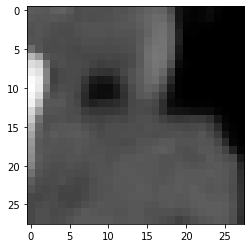

In [18]:
Size=28
qual_img=8
data=np.array(df.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")